# 데이터 전처리하기

In [114]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer

In [86]:
train = pd.read_csv("train.csv")

## 데이터 살펴보기

In [87]:
train

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,...,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,...,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,...,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,...,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,...,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,...,1.0,17,1.0,1.0,3.0,2.0,1.0,3.0,2.0,0
14996,14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,...,2.0,45,1.0,3.0,1.0,1.0,2.0,3.0,2.0,1
14997,14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,...,1.0,20,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1
14998,14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,...,1.0,29,1.0,12.0,4.0,2.0,2.0,2.0,1.0,0


In [88]:
train.columns

Index(['index', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
       'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'country', 'introelapse',
       'testelapse', 'surveyelapse', 'TIPI1', 'TIPI2', 'TIPI3', 'TIPI4',
       'TIPI5', 'TIPI6', 'TIPI7', 'TIPI8', 'TIPI9', 'TIPI10', 'VCL1', 'VCL2',
       'VCL3', 'VCL4', 'VCL5', 'VCL6', 'VCL7', 'VCL8', 'VCL9', 'VCL10',
       'VCL11', 'VCL12', 'VCL13', 'VCL14', 'VCL15', 'VCL16', 'education',
       'urban', 'gender', 'engnat', 'age', 'hand', 'religion', 'orientation',
       'voted', 'married', 'familysize', 'ASD', 'nerdiness'],
      dtype='object')

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 70 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         15000 non-null  int64  
 1   Q1            14959 non-null  float64
 2   Q2            14931 non-null  float64
 3   Q3            14950 non-null  float64
 4   Q4            14929 non-null  float64
 5   Q5            14962 non-null  float64
 6   Q6            14952 non-null  float64
 7   Q7            14924 non-null  float64
 8   Q8            14952 non-null  float64
 9   Q9            14944 non-null  float64
 10  Q10           14928 non-null  float64
 11  Q11           14941 non-null  float64
 12  Q12           14933 non-null  float64
 13  Q13           14960 non-null  float64
 14  Q14           14964 non-null  float64
 15  Q15           14955 non-null  float64
 16  Q16           14967 non-null  float64
 17  Q17           14963 non-null  float64
 18  Q18           14937 non-nu

In [90]:
train.describe

<bound method NDFrame.describe of        index   Q1   Q2   Q3   Q4   Q5   Q6   Q7   Q8   Q9  ...  engnat  age  \
0          0  1.0  5.0  5.0  5.0  1.0  4.0  5.0  5.0  1.0  ...     1.0   20   
1          1  4.0  4.0  4.0  4.0  4.0  5.0  4.0  4.0  3.0  ...     1.0   49   
2          2  4.0  5.0  5.0  4.0  3.0  5.0  5.0  5.0  4.0  ...     2.0   43   
3          3  4.0  4.0  4.0  2.0  4.0  3.0  3.0  5.0  3.0  ...     1.0   17   
4          4  4.0  4.0  4.0  4.0  3.0  3.0  4.0  2.0  3.0  ...     2.0   18   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...     ...  ...   
14995  14995  2.0  5.0  4.0  3.0  3.0  4.0  4.0  4.0  3.0  ...     1.0   17   
14996  14996  5.0  4.0  5.0  4.0  4.0  5.0  5.0  4.0  4.0  ...     2.0   45   
14997  14997  4.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  4.0  ...     1.0   20   
14998  14998  5.0  5.0  4.0  5.0  5.0  5.0  5.0  1.0  5.0  ...     1.0   29   
14999  14999  5.0  4.0  2.0  5.0  2.0  2.0  4.0  2.0  4.0  ...     2.0   21   

       hand  reli

## 이상 값 발견 

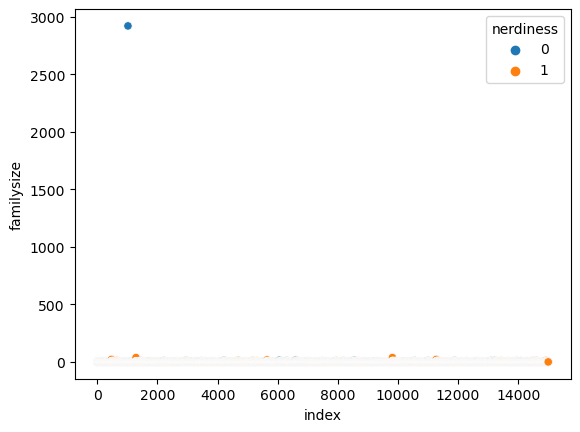

In [91]:
sns.scatterplot(y = train["familysize"], x = train["index"] ,hue = train["nerdiness"])
plt.show()

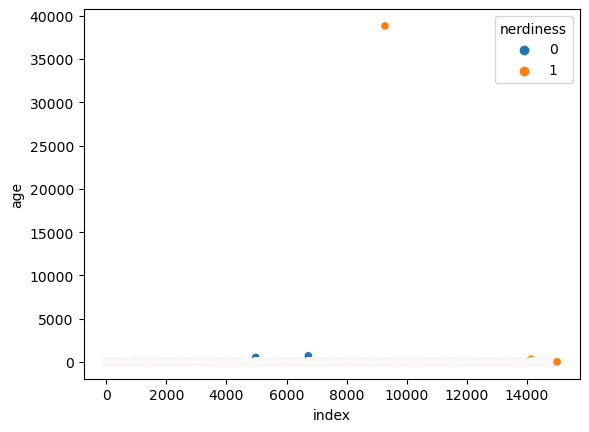

In [92]:
sns.scatterplot(y = train["age"], x = train["index"] ,hue = train["nerdiness"])
plt.show()

## 결측치 넣어주기

In [93]:
col = train.columns
for i,n in enumerate(col):
    print(i,n)
    if(i > 0 and i <27):
        train.loc[train[n].isnull()== True,n] = 3
    elif(i > 30 and i <41):
        train.loc[train[n].isnull()== True,n] = 0
    elif(i == 59 or i == 64):
        train.loc[train[n].isnull()== True,n] = 3
    elif(i ==57 or i == 60 or i == 62 or i == 63 or i == 65 or i == 66 or  i== 67 or i == 68):
        train.loc[train[n].isnull()== True,n] = 0

0 index
1 Q1
2 Q2
3 Q3
4 Q4
5 Q5
6 Q6
7 Q7
8 Q8
9 Q9
10 Q10
11 Q11
12 Q12
13 Q13
14 Q14
15 Q15
16 Q16
17 Q17
18 Q18
19 Q19
20 Q20
21 Q21
22 Q22
23 Q23
24 Q24
25 Q25
26 Q26
27 country
28 introelapse
29 testelapse
30 surveyelapse
31 TIPI1
32 TIPI2
33 TIPI3
34 TIPI4
35 TIPI5
36 TIPI6
37 TIPI7
38 TIPI8
39 TIPI9
40 TIPI10
41 VCL1
42 VCL2
43 VCL3
44 VCL4
45 VCL5
46 VCL6
47 VCL7
48 VCL8
49 VCL9
50 VCL10
51 VCL11
52 VCL12
53 VCL13
54 VCL14
55 VCL15
56 VCL16
57 education
58 urban
59 gender
60 engnat
61 age
62 hand
63 religion
64 orientation
65 voted
66 married
67 familysize
68 ASD
69 nerdiness


## object 데이터 타입 => 정수형으로 바꿔주기 (나라이름)

In [94]:
train.country.unique()

array(['USA', 'NLD', 'ITA', 'ARE', 'DNK', 'GRC', 'QAT', 'GBR', 'ROU',
       'HUN', 'AUS', 'POL', 'CAN', 'ARG', 'FRA', 'DEU', 'UKR', 'BGR',
       'PAK', 'EST', 'PHL', 'SVN', nan, 'SRB', 'NZL', 'SWE', 'MAR', 'IDN',
       'HKG', 'LUX', 'CHE', 'MYS', 'RUS', 'BRA', 'NOR', 'PRT', 'MEX',
       'IND', 'VNM', 'AUT', 'FIN', 'ESP', 'GUM', 'CHL', 'SGP', 'HND',
       'KOR', 'COL', 'IRL', 'CYP', 'BEL', 'AZE', 'IRQ', 'SVK', 'TUR',
       'NGA', 'ZAF', 'JPN', 'ISR', 'URY', 'ISL', 'GHA', 'CZE', 'KEN',
       'ECU', 'EGY', 'JOR', 'CRI', 'THA', 'PER', 'NPL', 'SAU', 'MKD',
       'DOM', 'PRI', 'TTO', 'CUW', 'BGD', 'LTU', 'HRV', 'IRN', 'GRL',
       'SDN', 'KWT', 'LVA', 'ALB', 'MDV', 'CHN', 'VEN', 'MUS', 'JAM',
       'TWN', 'LBN', 'TUN', 'BIH', 'PNG', 'GUF', 'MDG', 'DZA', 'BRN',
       'ALA', 'VGB', 'SLV', 'OMN', 'PRY', 'LBY', 'GEO', 'BWA', 'FRO',
       'BHR', 'ZMB', 'UGA', 'NAM', 'KAZ', 'VIR', 'MLT', 'ARM', 'BHS',
       'MAC', 'KHM', 'MNP', 'SYR', 'MNG', 'MOZ', 'FJI', 'AFG', 'FSM',
       'AGO', '

In [95]:
ctr = list(train.country.unique())

for _ in range(0, len(train.country)):
        train.country[_] = ctr.index(train.country[_])
train.country = pd.to_numeric(train.country)
    

In [96]:
 train.country

0         0
1         0
2         1
3         0
4         2
         ..
14995     0
14996     0
14997     0
14998     0
14999    33
Name: country, Length: 15000, dtype: int64

In [97]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 70 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         15000 non-null  int64  
 1   Q1            15000 non-null  float64
 2   Q2            15000 non-null  float64
 3   Q3            15000 non-null  float64
 4   Q4            15000 non-null  float64
 5   Q5            15000 non-null  float64
 6   Q6            15000 non-null  float64
 7   Q7            15000 non-null  float64
 8   Q8            15000 non-null  float64
 9   Q9            15000 non-null  float64
 10  Q10           15000 non-null  float64
 11  Q11           15000 non-null  float64
 12  Q12           15000 non-null  float64
 13  Q13           15000 non-null  float64
 14  Q14           15000 non-null  float64
 15  Q15           15000 non-null  float64
 16  Q16           15000 non-null  float64
 17  Q17           15000 non-null  float64
 18  Q18           15000 non-nu

## 이상값을 xgboost regressor 모델로 예측해서 넣어주기

In [99]:
train[train.age > 125 ]


,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
4976,4976,4.0,5.0,4.0,3.0,4.0,4.0,4.0,4.0,5.0,...,2.0,545,1.0,2.0,1.0,1.0,2.0,4.0,2.0,0
6725,6725,1.0,1.0,3.0,3.0,5.0,3.0,5.0,1.0,5.0,...,1.0,722,2.0,2.0,1.0,1.0,2.0,3.0,2.0,0
9273,9273,5.0,3.0,1.0,5.0,4.0,3.0,3.0,4.0,5.0,...,1.0,38822,1.0,2.0,3.0,2.0,1.0,3.0,2.0,1
14135,14135,4.0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,4.0,...,2.0,336,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1


In [100]:
age_index = train[train.age > 125 ].index

In [101]:
train[train.familysize == max(train.familysize)]

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
1019,1019,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,2.0,100,3.0,10.0,5.0,1.0,1.0,2919.0,1.0,0


In [102]:
train_1 = train.drop(train[train.age > 125 ].index)

xgb_1 = XGBRegressor( n_estimators=1000)
xgb_1.fit(train_1.drop(["age","nerdiness"],axis = 1), train_1.age)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [103]:
age_index

Int64Index([4976, 6725, 9273, 14135], dtype='int64')

In [104]:
age_xgb = xgb_1.predict(train[train.age > 125 ].drop(["age","nerdiness"],axis = 1))
for _ in range(0,len(age_index)):
    train.age[age_index[_]] = int(age_xgb[_])
print(train.age[age_index])

4976     49
6725     62
9273     11
14135    23
Name: age, dtype: int64


In [105]:
fsize_index = train[train.familysize == max(train.familysize)].index

In [106]:
train_2 = train.drop(fsize_index)

xgb_2 = XGBRegressor( n_estimators=1000)
xgb_2.fit(train_2.drop(["familysize","nerdiness"],axis = 1), train_2.familysize)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [107]:
fsize_xgb = xgb_2.predict(train[train.familysize == max(train.familysize)].drop(["familysize","nerdiness"],axis =1 ))
train.familysize[fsize_index] = fsize_xgb
print(train.familysize[fsize_index])

1019    3.922825
Name: familysize, dtype: float64


In [108]:
train[train.gender.isnull() == True]

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness


# 데이터 스케일링

In [78]:
def scaling(data):
    scale = QuantileTransformer(n_quantiles=100)
    col = train.drop(["nerdiness","index"],axis = 1).columns
    scale.fit(train[col])
    train_scale = scale.transform(train[col])
    train_scale = pd.DataFrame(data = train_scale)
    train_scale.columns = col
    return train_scale


In [79]:
train_scale = scaling(train)

In [80]:
train_describe = train.describe()
train_describe.to_csv("describe.csv")

# 모델 만들기 및 검증하기 (train data 에서 검증하기)

In [110]:
train_x , train_y , test_x, test_y = train_test_split(train_scale,train.nerdiness,test_size=0.1,random_state=2022)

In [115]:
xgb = XGBClassifier( n_estimators=3000,n_jobs = -1)
lgb = LGBMClassifier(n_estimators=3000,n_jobs = -1)
rfc = RandomForestClassifier(n_estimators=3000, n_jobs=-1)

xgb.fit(train_x, test_x)
lgb.fit(train_x, test_x)
rfc.fit(train_x, test_x)

RandomForestClassifier(n_estimators=3000, n_jobs=-1)

In [116]:
xgb.score(train_y,test_y)

0.7793333333333333

In [117]:
lgb.score(train_y,test_y)

0.7886666666666666

In [118]:
rfc.score(train_y,test_y)

0.7913333333333333